### Disciplina de Cálculo Numérico

#### Curso: Engenharia da Computação

#### Discente: Raphaell Maciel de Sousa

#### Data: 16/04/2020

Ex.: Considere a equação:

\begin{equation}
f(x) = \sqrt{3x+1}-2e^{-3x}
\end{equation}
O domínio da função é tal que:
\begin{equation}
3x+1>=0
\end{equation}
ou
\begin{equation}
x>=-1/3
\end{equation}

Obs.: A verificação do domínio é importante pois vai definir os limites de valores de entrada da função, ou seja, não se pode entrar com valores divergentes do domínio.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def f(x):
    #Domínio da função:
    #x>=-1/3
    return math.sqrt(3*x+1)-2*math.exp(-3*x)

#def f(x):
    #Domínio da função:
    #x<=5
#    return math.sqrt(5-x)-(2**x*2**(-1))

#### Fase 1: Isolameno da raiz em um intervalo

In [3]:
functionArray = []
xAxisArray = []

contSinal = 0

limInfX = -0.33
limSupX = 5
passoDeCalculo = 0.1

#limInfX = -2
#limSupX = 5
#passoDeCalculo = 1

for x in np.arange(limInfX, limSupX, passoDeCalculo, dtype=float):    
    functionArray.append(f(x))
    xAxisArray.append(x)
    
    if f(limInfX) > 0:        
        if f(x) < 0 and contSinal == 0:
            a0 = x-passoDeCalculo
            b0 = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a0
            print "Limite Superior", b0
            contSinal = 1
            
    else:        
        if f(x) > 0 and contSinal == 0:
            a0 = x-passoDeCalculo
            b0 = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a0
            print "Limite Superior", b0
            contSinal = 1

A raiz está entre o intervalo:
Limite Inferior: 0.06999999999999998
Limite Superior 0.16999999999999998


In [4]:
#https://docs.scipy.org/doc/scipy/reference/optimize.html

from scipy.optimize import fsolve

root = fsolve(f, 0.3)[0]
print "Raiz da equação via Scipy library:", root

Raiz da equação via Scipy library: 0.16427176178071182


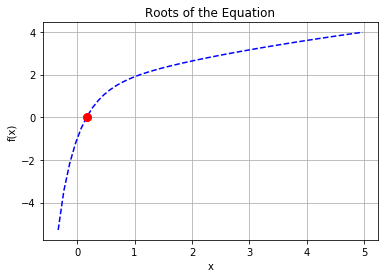

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color="red")
ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.grid(True)
plt.show()

### Fase 2: Refinamento das Raízes

#### Método da Bissecção ou Método do Meio Intervalo MMI

#### 1. Cálculo do Ponto Médio

\begin{equation}
\bar{x} = \frac{a + b}{2}
\end{equation}

In [6]:
def xMedioBisseccao(a, b):
    xMedio = (a + b)/2.0
    return xMedio

#### 2. Calcula-se f(xMedio):

```sh
Se f(xMedio)=0 => xMedio é raiz

Senão:

    Se f(xMedio)*f(a)<0
        a, b = (a, xMedio)
        
    Senão Se f(xMedio)*f(a)>0
        a, b = (xMedio, b)

```

In [7]:
print f(2)
print xMedioBisseccao(a0, b0)

print xMedioBisseccao(1.8125, 1.84375)
print f(xMedioBisseccao(1.8125, 1.84375))

2.64079380671
0.11999999999999998
1.828125
2.53814134098


In [8]:
cont = 0
a = a0
b = b0

if f(xMedioBisseccao(a,b)) == 0:
    print "A raiz da Equação é: ", xMedioBisseccao(a, b)

else:
    while (abs(f(xMedioBisseccao(a, b)))>0.001):
        xMedio = xMedioBisseccao(a,b)
        if f(xMedio)*f(a)<0:
            b = xMedioBisseccao(a,b)          
        
        if f(xMedio)*f(a)>0:
            a = xMedioBisseccao(a,b)
        
        cont = cont+1

print "A raiz da equação pelo método da Bissecção é: ", xMedioBisseccao(a,b)
print "Raiz obtida com ", cont, "iterações"

A raiz da equação pelo método da Bissecção é:  0.16414062499999998
Raiz obtida com  7 iterações


/home/raphaell/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


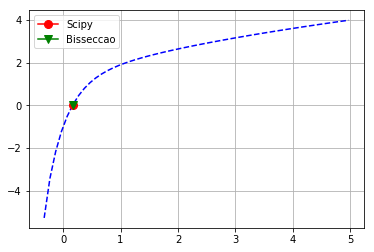

In [9]:
# fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color='red', label='Scipy')
plt.plot([xMedioBisseccao(a,b)], [0], marker='v', markersize=8, color='green', label='Bisseccao')

ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

plt.grid(True)
plt.legend()

#### Método da Posição Falsa

É similar ao método anterior, porém, a estimativa da raiz é feita por meio de média ponderada, como segue:

\begin{equation}
\bar{x} = \frac{af(b)-bf(a)}{f(b)-f(a)}
\end{equation}

In [10]:
def xMedioMMI(a, b):
    xMedio = (a*f(b) - b*f(a))/(f(b)-f(a))
    return xMedio

In [11]:
cont = 0
a = a0
b = b0

if f(xMedioMMI(a,b)) == 0:
    print "A raiz da Equação é: ", xMedioMMI(a, b)

else:
    while (abs(f(xMedioMMI(a, b)))>0.01):
        xMedio = xMedioMMI(a,b)
        if f(xMedio)*f(a)<0:
            b = xMedioMMI(a,b)          
        
        if f(xMedio)*f(a)>0:
            a = xMedioMMI(a,b)
            
        cont = cont+1
                
print "A raiz da equação pelo método MMI é: ", xMedioMMI(a,b)
print "Raiz obtida com ", cont, "iterações"

A raiz da equação pelo método MMI é:  0.16493087045286994
Raiz obtida com  0 iterações


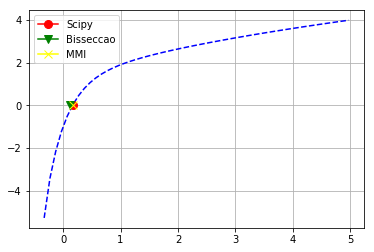

In [12]:
# fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color='red', label='Scipy')
plt.plot([xMedioBisseccao(a,b)], [0], marker='v', markersize=8, color='green', label='Bisseccao')
plt.plot([xMedioMMI(a,b)], [0], marker='x', markersize=8, color='yellow', label='MMI')

ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

plt.grid(True)
plt.legend()